# Student Study Hours Analysis

Will use Linear Regression Model to predict and analyze

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Exploring Data

In [2]:
df = pd.read_csv("./data/score.csv")

df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

We have just one feature which is Hours (study hours)

## Preparation

In [4]:
df = df.rename(columns={"Hours":"hour", "Scores":"score"})

## Plotting the Data to More Explore

<Axes: xlabel='hour', ylabel='score'>

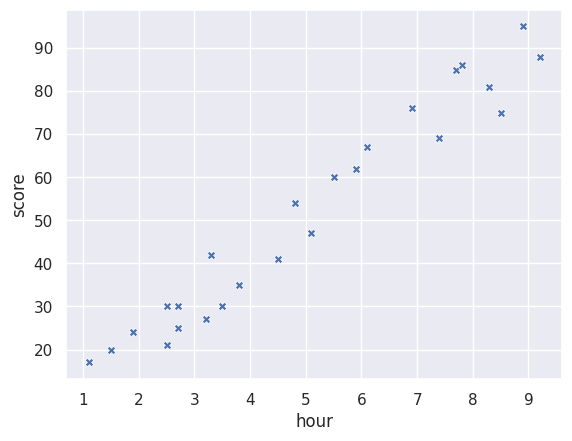

In [5]:
sns.scatterplot(data=df, x="hour", y="score", marker="X")

In [6]:
df.describe()

,hour,score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Prediction the Scores with Study Hours

In [7]:
X = df[['hour']]
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

fitting the data

In [8]:
reg = LinearRegression().fit(X_train, y_train)

and prediction

In [23]:
y_pred = reg.predict(X_test)

### Results

In [24]:
print("Results:\n----------")
print(f"Intercept: {reg.intercept_}")
print(f"Coef: {reg.coef_}")
print(f"Mean Error: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"\nR^2 Score: {r2_score(y_test,y_pred)}")

Results:
----------
Intercept: 1.9322042531516601
Coef: [9.94167834]
Mean Error: 4.509204328368805

R^2 Score: 0.9367661043365056


### Plotting our Model 

<Axes: xlabel='hour', ylabel='actual'>

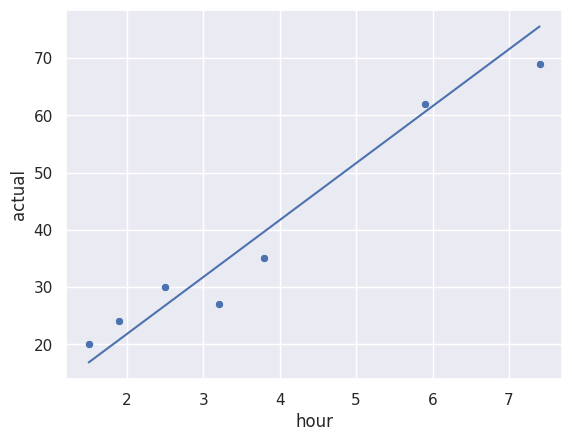

In [10]:
results_df = X_test.copy()
results_df['actual'] = y_test
results_df['forecasted'] = y_pred

f, ax = plt.subplots(1, 1, sharex=True)

sns.scatterplot(data=results_df, x="hour", y="actual", ax=ax)
sns.lineplot(data=results_df, x="hour", y="forecasted", ax=ax)

## Conclusion

so, if I study 6.2 hour for this exam, then I probably get this score:

(you can change the `my_study_hours` variable and predict your score)

In [20]:
# change this variable to predict your score
my_study_hours = 6.2

my_X = pd.DataFrame({"hour":[my_study_hours]})

print(f"After {my_study_hours} hour studying, my score is: {round(reg.predict(my_X)[0],2)}")

After 6.2 hour studying, my score is: 63.57
